# Импорты

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Курсовая

/content/drive/MyDrive/Курсовая


In [3]:
import pandas as pd
import pickle

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

# Подготовка

In [4]:
pd.options.display.float_format = "{:,.2f}".format

In [5]:
# словарь с loss на train/val
with open('res.pickle', 'rb') as f:
  res_dct = pickle.load(f)

# Функции

In [40]:
def plot_loss(key, title, num_epochs, name):
  plt.figure(figsize=(5,3))
  if title:
    plt.title(f'BERT_{title}, {num_epochs} эпох обучения')
  else:
    plt.title(f'BERT, {num_epochs} эпох обучения')

  plt.plot(res_dct[key]['train_loss'], label='train_loss')
  plt.plot(res_dct[key]['val_loss'], label='val_loss')

  plt.grid(True)
  plt.legend()
  plt.xticks(range(len(res_dct[key]['train_loss'])), range(1,len(res_dct[key]['train_loss'])+1))

  plt.ylabel('кросс-энтропия')
  plt.xlabel('номер эпохи')

  plt.savefig(f'{name}.svg', bbox_inches='tight')

  plt.show()

# Графики лосса на train/val

## BERT без каких-либо модификаций

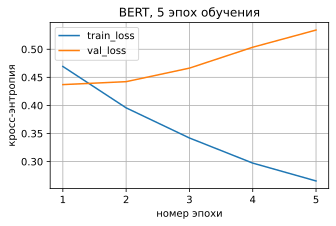

In [41]:
plot_loss(key='without', title='', num_epochs=5, name='bert')

## BERT, где в текст добавлена информация

### 1. {tweet} [SEP] The author of the text is {username}

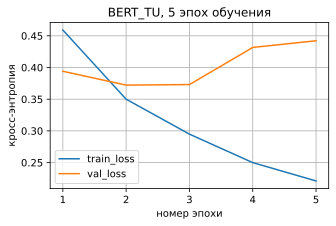

In [53]:
plot_loss(key='tweet_author_is', title="TU", num_epochs=5, name='bert_tweet_author_is')

### 2. {tweet} [SEP] {username}

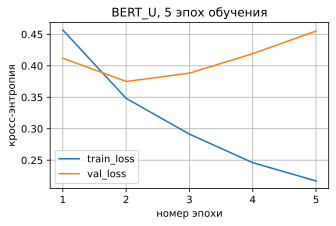

In [43]:
plot_loss(key='tweet_author', title="U", num_epochs=5, name='bert_tweet_author')

### 3. {tweet} [SEP] The sentiment is {positive/negative}

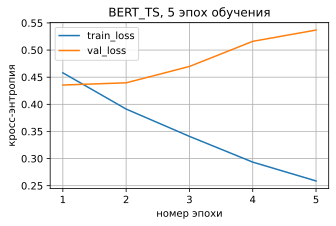

In [54]:
plot_loss(key='tweet_sentiment_is', title="TS", num_epochs=5, name='bert_tweet_sentiment_is')

### 4. {tweet} [SEP] {positive/negative}

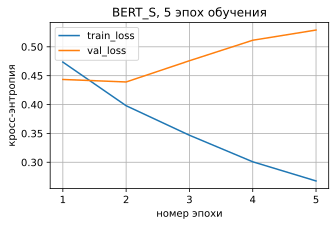

In [45]:
plot_loss(key='tweet_sentiment', title="S", num_epochs=5, name='bert_tweet_sentiment')

## BERT с использованием эмбеддингов пользователей

### Эмбеддинги, полученные с помощью LDA

In [46]:
keys = ['post_lda_2', 'post_lda_5', 'post_lda_10', 'post_lda_20',
        'user_lda_2', 'user_lda_5', 'user_lda_10', 'user_lda_20']

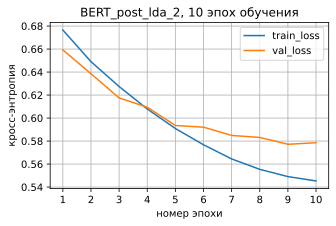

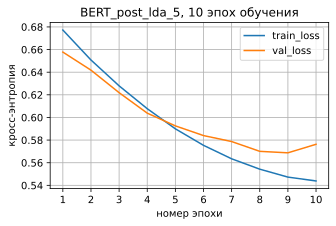

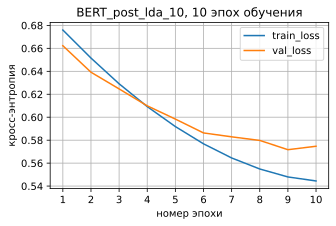

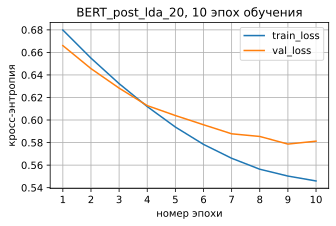

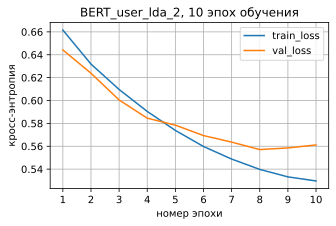

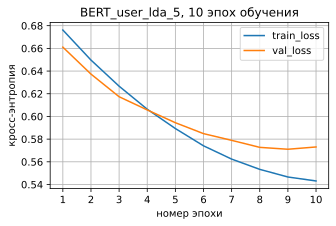

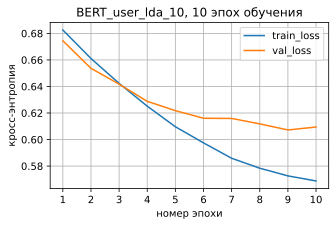

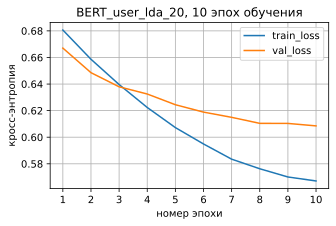

In [47]:
for key in keys:
  plot_loss(key=key, title=f"{key}", num_epochs=10, name=f'bert_{key}')

### Эмбеддинги, полученные с помощью Word2Vec / GloVe

In [48]:
keys = ['glove_100', 'glove_200', 'w2v_300']

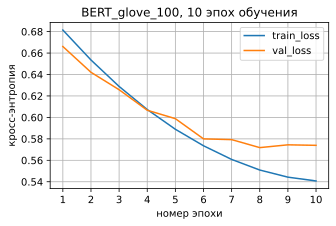

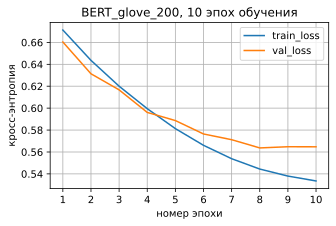

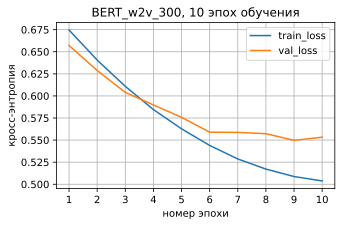

In [49]:
for key in keys:
  plot_loss(key=key, title=f"{key}", num_epochs=10, name=f'bert_{key}')

### Эмбеддинги, полученные с помощью BERT

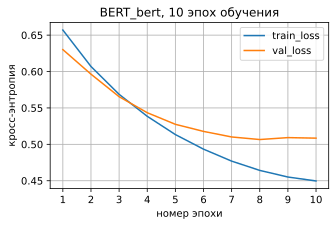

In [50]:
plot_loss(key='bert', title="bert", num_epochs=10, name='bert_bert')

## BERT, где в текст добавлена информация + эмбеддинги, полученные с помощью BERT

### 1. {tweet} [SEP] The author of the text is {username}

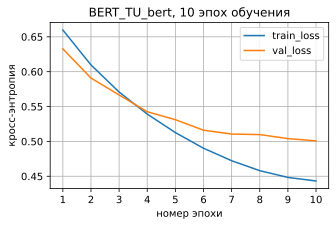

In [51]:
plot_loss(key='tweet_author_is_bert', title="TU_bert", num_epochs=10, name='bert_tweet_author_is_bert')

### 2. {tweet} [SEP] {username}

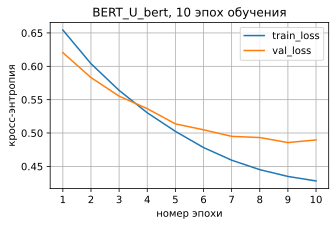

In [52]:
plot_loss(key='tweet_author_bert', title="U_bert", num_epochs=10, name='bert_tweet_author_bert')

# Итоговые таблицы с результатом на test

Для BERT без каких-либо модификаций и BERT, где в текст добавлена информация, буду использовать модель, обученную на 2 эпохах, так как далее видно переобучение.

Для BERT c использованием эмбеддингов буду использовать модель, обученную на 9 эпохах, так как далее начинается переобучение.

Для BERT, где в текст добавлена информация + эмбеддинги, полученные с помощью BERT буду использовать модель, обученную на 10 эпохах.

Обозначения для BERT, где в текст добавлена информация:
1. {tweet} [SEP] The author of the text is {username} - **BERT_TU**
2. {tweet} [SEP] {username} - **BERT_U**
3. {tweet} [SEP] The sentiment is {positive/negative} - **BERT_TS**
4. {tweet} [SEP] {positive/negative} - **BERT_S**

In [55]:
# сравнение BERT и BERT, где в текст добавлена информация
pd.DataFrame({'BERT': 84.47,
              'BERT_TU': 87.20,
              'BERT_U': 87.40,
              'BERT_TS': 84.46,
              'BERT_S': 84.12}, index=[1])

,BERT,BERT_TU,BERT_U,BERT_TS,BERT_S
1,84.47,87.20,87.40,84.46,84.12


In [ ]:
# сравнение BERT и BERT c использованием эмбеддингов
pd.DataFrame({'BERT': 84.47,
              'BERT_post_lda_2': 84.34,
              'BERT_post_lda_5': 84.68,
              'BERT_post_lda_10': 84.70,
              'BERT_post_lda_20': 84.47,
              'BERT_user_lda_2': 84.28,
              'BERT_user_lda_5': 84.46,
              'BERT_user_lda_10': 84.21,
              'BERT_user_lda_20': 84.23,
              'BERT_glove_100': 85.11,
              'BERT_glove_200': 84.98,
              'BERT_w2v_300': 84.83,
              'BERT_bert': 85.15}, index=[1])

,BERT,BERT_post_lda_2,BERT_post_lda_5,BERT_post_lda_10,BERT_post_lda_20,BERT_user_lda_2,BERT_user_lda_5,BERT_user_lda_10,BERT_user_lda_20,BERT_glove_100,BERT_glove_200,BERT_w2v_300,BERT_bert
1,84.47,84.34,84.68,84.70,84.47,84.28,84.46,84.21,84.23,85.11,84.98,84.83,85.15


In [56]:
# сравнение BERT и BERT, где в текст добавлена информация + эмбеддинги, полученные с помощью BERT
pd.DataFrame({'BERT': 84.47,
              'BERT_TU_bert': 87.29,
              'BERT_U_bert': 86.94}, index=[1])

,BERT,BERT_TU_bert,BERT_U_bert
1,84.47,87.29,86.94


По итогу наилучший прирост по качеству показал способ добавления информации непосредственно в текст (BERT_U).

Из способов добавления эмбеддингов, наилучший прирост по качеству показали эмбеддинги, полученные с помощью GloVe размерности 100.

BERT, где в текст добавлена информация + эмбеддинги, полученные с помощью BERT показал прирост по качеству для BERT_TU, но для BERT_U нет. Поскольку в модели, которая добавляет эмбеддинги есть MLP, то там возможно требуется дополнительное исследование на предмет архитектуры MLP и ее обучения для получения прироста качества.